In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

## Data Collection

In [11]:
#Read Data
groceries = []

with open("C:/Users/manth/Assignment/Association rules/groceries.csv") as f:
    groceries = f.read()
# print(groceries)

In [12]:
# split each row as transactions

groceries = groceries.split("\n")
len(groceries)

9836

In [13]:
# split each transactions(line) as seperate product by spliting columns

groceries_list =[]

for transaction in groceries:
    groceries_list.append(transaction.split(","))
# print(groceries_list)
# len(groceries_list)

In [15]:
#store all the indivisual products in one single list []

all_groceries_list = [product for transaction in groceries_list for product in transaction]
# print(all_groceries_list)
# len(all_groceries_list)

## Exploratory Data Analysis (EDA)

In [17]:
from collections import Counter
from collections import OrderedDict

item_frequency=Counter(all_groceries_list)
# print(item_frequency)

In [18]:
item_frequency=sorted(item_frequency.items(), key = lambda x:x[1]) 
# print(item_frequency)
len(item_frequency)

170

In [19]:
#Split Items(products) and its frequency

frequencies = list(reversed([i[1] for i in item_frequency]))
items = list(reversed([i[0] for i in item_frequency]))

print(len(frequencies))
print(len(items))

170
170


In [20]:
# Top 10 proucts based on frequency

print(frequencies[0:10])
print(items[0:10])

[2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924]
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage']


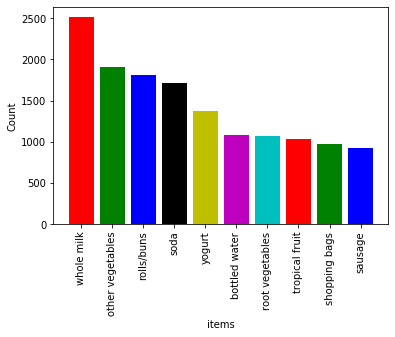

In [21]:

# Visualize the top 10 products 

plt.bar (items[0:10],height = frequencies[0:10],color='rgbkymc')
plt.xticks(list(range(0,10),),items[0:10], rotation = 90)
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [23]:
# Creating Data Frame for the transactions data 

groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction
groceries_series.columns = ["transactions"]
groceries_series["transactions"]

0       [citrus fruit, semi-finished bread, margarine,...
1                        [tropical fruit, yogurt, coffee]
2                                            [whole milk]
3        [pip fruit, yogurt, cream cheese , meat spreads]
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9830    [sausage, chicken, beef, hamburger meat, citru...
9831                                  [cooking chocolate]
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
Name: transactions, Length: 9835, dtype: object

In [24]:
X = groceries_series['transactions'].str.join(sep='*')
# print(X)

# create dummy variable for each 
X= X.str.get_dummies(sep='*')
X.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Association Rule Mining

In [25]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

# min_spport = Threshold; max_len = only for the transaction with max 3 products
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(whole milk, yogurt, soda)"
985,0.007931,"(whole milk, tropical fruit, whipped/sour cream)"
986,0.006202,"(yogurt, tropical fruit, whipped/sour cream)"
987,0.015150,"(whole milk, yogurt, tropical fruit)"


In [26]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
...,...,...
874,0.005084,"(whole milk, tropical fruit, newspapers)"
276,0.005084,"(whole milk, chewing gum)"
332,0.005084,"(frankfurter, coffee)"
346,0.005084,"(curd, cream cheese )"


In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2559,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2023,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2018,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
1312,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2041,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2044,(onions),"(root vegetables, other vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
2204,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
2205,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688


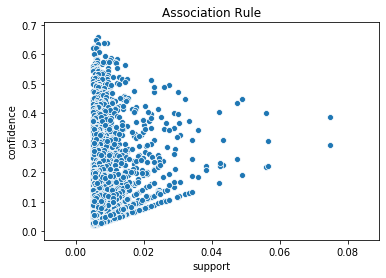

In [28]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule")
plt.show()

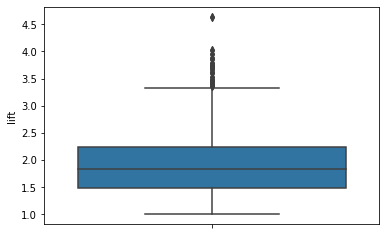

In [29]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

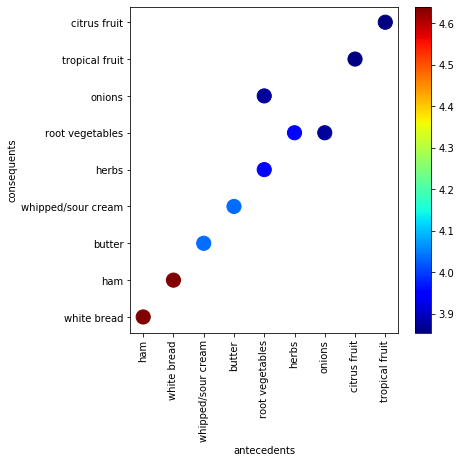

In [37]:
A = rules.antecedents.iloc[0:10]
B = rules.consequents.iloc[0:10]
C = rules.lift.iloc[0:10]

# frozen set error so change A & B:

A = A.apply(lambda x: list(x)[0]).astype("unicode")
B = B.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A,B, s = 200, c=C, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

# With different values of support, confidence and length

# Association Rule Mining

In [38]:
frequent_itemsets1 = apriori(X, min_support=0.003,max_len= 2,use_colnames = True)
# Most Frequent item sets based on support in decending order
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
print(frequent_itemsets1)
print("\n\n")

rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1.head(10)

       support                           itemsets
133   0.255516                       (whole milk)
83    0.193493                 (other vegetables)
98    0.183935                       (rolls/buns)
111   0.174377                             (soda)
134   0.139502                           (yogurt)
...        ...                                ...
1243  0.003050  (soft cheese, whipped/sour cream)
664   0.003050               (dessert, margarine)
844   0.003050       (grapes, whipped/sour cream)
991   0.003050           (sliced cheese, napkins)
110   0.003050                   (snack products)

[1276 rows x 2 columns]





,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2066,(hamburger meat),(Instant food products),0.033249,0.008033,0.003050,0.091743,11.421438,0.002783,1.092166
2067,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640
1164,(sugar),(flour),0.033859,0.017387,0.004982,0.147147,8.463112,0.004394,1.152148
1165,(flour),(sugar),0.017387,0.033859,0.004982,0.286550,8.463112,0.004394,1.354182
2114,(processed cheese),(ham),0.016573,0.026029,0.003050,0.184049,7.070792,0.002619,1.193663
2115,(ham),(processed cheese),0.026029,0.016573,0.003050,0.117188,7.070792,0.002619,1.113970
1434,(processed cheese),(white bread),0.016573,0.042095,0.004169,0.251534,5.975445,0.003471,1.279824
1435,(white bread),(processed cheese),0.042095,0.016573,0.004169,0.099034,5.975445,0.003471,1.091524
1921,(sugar),(baking powder),0.033859,0.017692,0.003254,0.096096,5.431639,0.002655,1.086740
1920,(baking powder),(sugar),0.017692,0.033859,0.003254,0.183908,5.431639,0.002655,1.183863


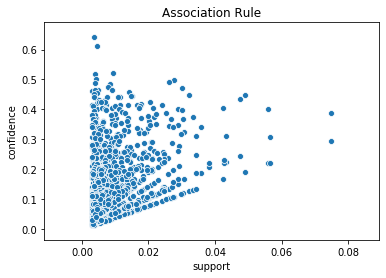

In [39]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule")
plt.show()

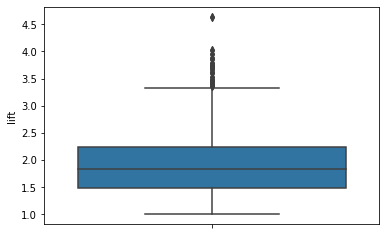

In [40]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules1,orient='v')
plt.show()

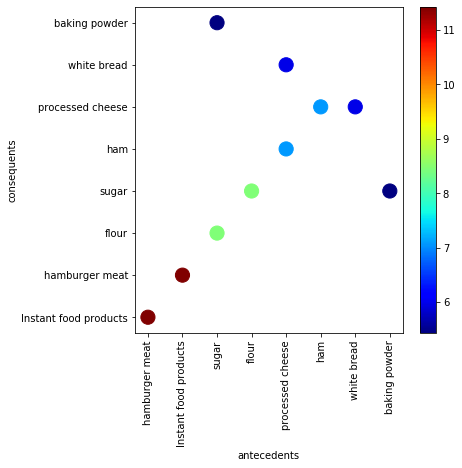

In [41]:
A1 = rules1.antecedents.iloc[0:10]
B1 = rules1.consequents.iloc[0:10]
C1 = rules1.lift.iloc[0:10]

# frozen set error so change A & B:

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()